## 1.Overview of the dataframe

In [44]:
import pandas
from datetime import datetime
data= pandas.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv", parse_dates=['Date'])

In [2]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [3]:
data.shape

(5268, 13)

In [4]:
data.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Aboard'}>]], dtype=object)

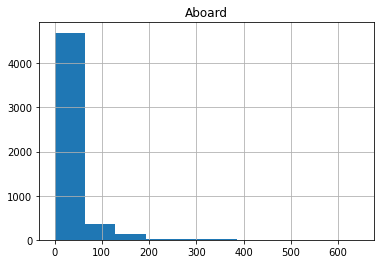

In [5]:
data.hist('Aboard')

## 2. Selecting data from the dataframe

### Select a column

In [6]:
data['Fatalities']

0         1.0
1         5.0
2         1.0
3        14.0
4        30.0
        ...  
5263     98.0
5264      4.0
5265    228.0
5266      1.0
5267     13.0
Name: Fatalities, Length: 5268, dtype: float64

## Select multiple columns

In [7]:
data[['Location', 'Fatalities']]

,Location,Fatalities
0,"Fort Myer, Virginia",1.0
1,"AtlantiCity, New Jersey",5.0
2,"Victoria, British Columbia, Canada",1.0
3,Over the North Sea,14.0
4,"Near Johannisthal, Germany",30.0
...,...,...
5263,"Near Madiun, Indonesia",98.0
5264,"Near Isiro, DemocratiRepubliCongo",4.0
5265,"AtlantiOcean, 570 miles northeast of Natal, Br...",228.0
5266,"Near Port Hope Simpson, Newfoundland, Canada",1.0


In [8]:
data.iloc[3]

Date                                                   09/09/1913
Time                                                        18:30
Location                                       Over the North Sea
Operator                                   Military - German Navy
Flight #                                                      NaN
Route                                                         NaN
Type                                       Zeppelin L-1 (airship)
Registration                                                  NaN
cn/In                                                         NaN
Aboard                                                       20.0
Fatalities                                                   14.0
Ground                                                        0.0
Summary         The airship flew into a thunderstorm and encou...
Name: 3, dtype: object

### Selecting multple rows

In [9]:
data.iloc[1:3]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...


### Selecting a section

In [10]:
data[['Location','Fatalities']].iloc[1:3]

,Location,Fatalities
1,"AtlantiCity, New Jersey",5.0
2,"Victoria, British Columbia, Canada",1.0


### Selecting a cell

In [11]:
data['Time'].iloc[4]

'10:30'

In [12]:
data.at[2,'Fatalities']

1.0

## 3.  Filtering data based on conditions

### One condition

In [24]:
d2 = data[data['Fatalities']> 50.0]

### Multiple conditions

In [31]:
data[(data['Fatalities']>25.0) & (data['Operator'] == 'Military - U.S. Army')] 

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
746,11/11/1945,NaN,Himalayas,Military - U.S. Army,NaN,"Chabau, India - Karachi, Pakistan",Douglas C-54,NaN,NaN,44.0,44.0,0.0,Crashed into a mountain ridge 200 ft. short of...
2229,06/25/1968,07:30,"Near Bearcat, South Vietnam",Military - U.S. Army,NaN,NaN,Bell UH-1H / Bell UH-1H / Bell UH-1H,NaN,NaN,29.0,29.0,0.0,A mid-air collision between three helicopters ...
2313,05/06/1969,13:20,"Near Chon Thanh, South Vietnam",Military - U.S. Army,NaN,NaN,Boeing Vertol CH47A (helicopter),66-19029,NaN,74.0,30.0,0.0,"As the helicopter was taking off, the landing ..."
2417,08/26/1970,NaN,"Near Tam Ky, South Vietnam",Military - U.S. Army,NaN,NaN,Boeing Vertol CH47B (helicopter),67-18445,NaN,32.0,30.0,0.0,Shot down by a rocket grenade.
2490,08/18/1971,09:40,"Near Pegnitz, West Germany",Military - U.S. Army,NaN,Ludwigsburg - Grafenwohr,Boeing Vertol CH-47A (helicopter),66-19023,NaN,37.0,37.0,0.0,"The helicopter, carrying American troops to an..."
2511,11/28/1971,13:30,"Near Hue, South Vietnam",Military - U.S. Army,NaN,Da Nang - Camp Eagle,Boeing Vertol CH-47C,68-15866,NaN,34.0,34.0,0.0,Crashed into a mountain after attempting to fl...
2549,05/10/1972,10:25,"Near Gia Dinh, South Vietnam",Military - U.S. Army,NaN,Bien Hoa - Vung Tau,Boeing Vertol CH47A (helicopter),NaN,NaN,34.0,34.0,0.0,Metal fatigue of the spar in a blade led to se...
3377,09/11/1982,12:50,"Near Mannheim, West Germany",Military - U.S. Army,NaN,NaN,Boeing Vertol CH-47C (helicopter),74-22292,NaN,46.0,46.0,0.0,Crashed after experiencing catastrophimechanic...


## 4. Time-based filtering

In [53]:
data[(data['Date'] >= datetime(1970,1,1)) & (data['Date'] <= datetime(1990, 1, 1))]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
1237,1970-02-13,NaN,"Pin-la-Garenne, France",Avia-Taxi,NaN,NaN,Cessna 402,F-BPJA,402-0100,10.0,10.0,0.0,NaN
1643,1973-05-11,NaN,"Near Semipalatinsk, USSR",Aeroflot,NaN,NaN,Ilyushin IL-18B,SSR-75687,189001202,61.0,61.0,0.0,NaN
1807,1973-10-12,NaN,"Acapulco, Mexico",Avionas Banamex,NaN,NaN,de Havilland DH-125-1A,XA-COL,25086,8.0,8.0,0.0,Crashed while approaching to land.
1965,1973-10-15,NaN,"Fort Smith AFB, Oklahoma",Military - U.S. Air Force,NaN,NaN,Lockheed C-130E Hercules,62-1845,3808,7.0,7.0,0.0,Crashed into a mountain.
2003,1975-07-31,NaN,"Santiago, Chili",Military - Chilian Air Force,NaN,NaN,Douglas C-47,970,NaN,10.0,10.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,1989-12-01,09:30,"Patuxent, Maryland",Military - U.S. Army,NaN,Fort Belvoir - Patuxent River NAS,CASA 212 Aviocar 200,N296CA,296,5.0,5.0,0.0,The crew inadvertently selected 'Beta Range' o...
3907,1989-12-21,14:00,"Near Guayaramerin, Bolivia",Military - Bolivian Air Force,NaN,Guayaramerin - Santa Cruz,Lockheed C-130A,TAM-62,3187,28.0,24.0,0.0,The passenger flight crashed into a jungle sho...
3909,1989-12-26,22:30,"Pasco, Washington",United Express,2415,Yakima - Pasco,British Aerospace 3101 Jetstream 31,N410UE,776,6.0,6.0,0.0,The aircraft was observed sinking fast while a...
3910,1989-12-28,NaN,"Near Visina, Romania",Tarom,NaN,Bicharest - Beogard,Antonov An-24RV,YR-BMJ,77310801,7.0,7.0,0.0,Crashed in poor weather conditions. Rumors sug...


In [50]:
data['Date']

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
          ...    
5263   2009-05-20
5264   2009-05-26
5265   2009-06-01
5266   2009-06-07
5267   2009-06-08
Name: Date, Length: 5268, dtype: datetime64[ns]

## 5. From data to information

## Average fatalities

In [54]:
data['Fatalities'].mean()

20.06830289193303

## Average rating for a particular course

In [56]:
data[data['Operator']== 'Military - U.S. Army']['Fatalities'].mean()

21.652173913043477

## Average rating for a particular period

In [58]:
data[(data['Date'] >= datetime(1970,1,1)) & (data['Date'] <= datetime(1975, 1, 1))]['Fatalities'].mean()

27.321678321678323

## Average Aboard

In [59]:
data['Aboard'].mean()

27.554517727792604

## Average of fatalities with more than 200 aboard

In [63]:
data[(data['Fatalities']>200.0) & (data['Aboard'])]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
2726,1974-03-03,11:41,"Near Ermenonville, France",Turkish Airlines (THY),981,Paris - London,McDonnell Douglas DC-10-10,TC-JAV,46704/29,346.0,346.0,0.0,The aircraft crashed shortly after takeoff fro...
2963,1977-03-27,17:07,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,644.0,583.0,0.0,Both aircraft were diverted to Tenerife becaus...
3029,1978-01-01,20:15,"Off Bandra, Maharashtra, India",Air India,855,Bombay - Dubai,Boeing B-747-237B,VT-EBD,19959/124,213.0,213.0,0.0,"Following a right turn, after taking off, the ..."
3137,1979-05-25,15:04,"Chicago O'Hare, Illinois",American Airlines,191,"Chicago, IL- Los Angeles, CA",McDonnell Douglas DC-10-10,N110AA,46510/22,271.0,271.0,2.0,"During takeoff just, as the plane lifted from ..."
3187,1979-11-28,12:49,"Near Mt. Erebus, Ross Ice Shelf, Antarctica",Air New Zealand,901,Auckland - Christchurch,McDonnell Douglas DC-10-30,ZK-NZP,46910/182,257.0,257.0,0.0,The aircraft crashed into the slopes of Mt. Er...
3240,1980-08-19,19:08,"Near Riyadh, Saudi Arabia",Saudi Arabian Airlines,163,Riyadh - Jeddah,Lockheed 1011-200 TriStar,HZ-AHK,1169,301.0,301.0,0.0,The flight experienced a fire in the aft cargo...
3436,1983-09-01,18:26,"Near Sakhalin Island, Russia",Korean Airlines,007,Anchorage - Seoul,Boeing B-747-230B,HL-7442,20559/186,269.0,269.0,0.0,"On a flight from Alaska to South Korea, the ai..."
3513,1984-10-28,NaN,"Near Kabul, Afghanistan",Military - Russian Air Force,NaN,NaN,Antonov AN-22,CCCP-08837,7340106,240.0,240.0,0.0,Shot down by Afghan rebels shortly after takin...
3562,1985-06-23,07:15,"AtlantiOcean, 110 miles West of Ireland",Air India,182,Montreal - London,Boeing B-747-237B,VT-EFO,21473/330,329.0,329.0,0.0,The aircraft broke up in flight and crashed in...
3568,1985-08-12,18:56,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,123,Tokyo - Osaka,Boeing B-747-SR46,JA8119,20783/230,524.0,520.0,0.0,The aircraft suffered an aft pressure bulkhead...


In [66]:
data[data['Time'].isnull()].count()

Date            2219
Time               0
Location        2202
Operator        2204
Flight #          72
Route            990
Type            2193
Registration    1981
cn/In           1597
Aboard          2197
Fatalities      2207
Ground          2200
Summary         1845
dtype: int64

## Crashes that went missing

In [70]:
data[data['Summary'].str.contains('missing',na=False)]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
642,1944-02-21,NaN,"Eubeoa, Greece",Deutsche Lufthansa,NaN,NaN,Junkers JU-52/3m,D-ABAS,6561,16.0,16.0,0.0,The plane missing and never found.
666,1944-09-07,NaN,"Near Mossman, Queensland, Australia",Military - Royal Netherlands East Indies Air F...,NaN,Merauke -- Cairns,C-47 Dakota DT-941,VH-RDK,NaN,20.0,20.0,0.0,The plane went missing while en route from Mer...
788,1946-07-20,12:15,Off the Panama coast,Military - (2) U.S. Army Air Forces,NaN,NaN,Boeing B-17G / Boeing B-17G,4485624/4485626,NaN,20.0,20.0,0.0,"The two aircraft collided in midair, 20 miles ..."
1155,1951-10-15,NaN,North Atlantic,Military - U.S. Air Force,NaN,Azores - Westover AFB,Boeing C-97A Stratofreighter,49-2602,16224,12.0,12.0,0.0,Went missing en route.
1247,1953-03-04,NaN,"Windsor Locks, Connecticut",Slick Airways,162,"New York, NY - Winsor Locks, CT",Curtiss C-46F,N4717N,22400,2.0,2.0,0.0,After missing his first approach to the airpor...
1492,1957-07-25,03:37,"Daggett, California",Western Airlines,39,Minneapolis -- Salt Lake - Cedar City - Las Ve...,Convair CV-240,N8405H,22,16.0,1.0,0.0,The plane landed safely after a dynamite bomb ...
1571,1958-11-09,13:21,North AtlantiOcean,ARTOP Aerotopografica LDA,NaN,Cabo Ruivo - Funchal,Martin Mariner,CS-THB,59144,36.0,36.0,0.0,The aircraft was missing on a flight from Cabo...
1744,1961-11-11,NaN,Off Puerto Rico,Air Haiti International,NaN,"San Juan, PR - Managua",Lockheed L-749A Constellation,HH-ABA,2615,3.0,3.0,0.0,Went missing en route.
2243,1969-03-08,NaN,AtlantiOcean,Continental Air Transport,NaN,"Halifax, NS - Santa Maria, Portugal",Douglas DC-4,N3821,10356,3.0,3.0,0.0,The cargo plane went missing en route.
2353,1969-11-12,15:00,"Point Alexander, Alaska",Channel Flying Service - Air Taxi,NaN,"Sitka, AK - Pt. Alexander, AK",Cessna 180H,N8216V,NaN,2.0,2.0,0.0,The wreckage of the float plane was found on a...
